# 1. Optimizing the Ackley function

In [1]:
Ackley <- function(x,d){
    
    return (-20*exp(-0.2*sqrt(sum(x^2)/d)) -exp( sum(cos(2*pi*x))/d) + 20 +exp(1))
    
}

In [10]:
ackley <- function(x) {
  d <- length(x)
  sum1 <- sum(x^2)
  sum2 <- sum(cos(2 * pi * x))
  term1 <- -20 * exp(-0.2 * sqrt(1/d * sum1))
  term2 <- -exp(1/d * sum2)
  f <- term1 + term2 + 20 + exp(1)
  return(f)
}

In [16]:
ackley(3)

[1] 9.023767

In [17]:
Ackley(3,1)

[1] 9.023767

# SRS

In [11]:
# Minimize Loss over the [-32,32]^d hypercube
# where f.loss( theta )

minimize.srs <- function(
  f.loss, dd = 2, nn = 1e5
){
  theta    = matrix( 0, nrow = nn, ncol = dd)
  val.loss = rep(0,nn)
  # Simulate a first datapoint
  theta[1,]   = runif( dd, -32,32 );
  val.loss[1] = f.loss( theta[1,] );
  pb = txtProgressBar(1,nn,style=3)
  for( ii in 2:nn ){
    # Simulate additional points
    theta[ii,]   = runif( dd, -32,32 );
    val.loss[ii] = f.loss( theta[ii,] );
    if( val.loss[ii]>val.loss[ii-1] ){
      # If we don't improve, switch back to the
      # previous theta_{i-1}
      theta[ii,]   <- theta[ii-1,];
      val.loss[ii] <- val.loss[ii-1];
    }    
    setTxtProgressBar(pb,ii)
  }
  close(pb)
  return(
    list(
      theta = theta,
      loss  = val.loss
    )
  )
}

  |======================================================================| 100%


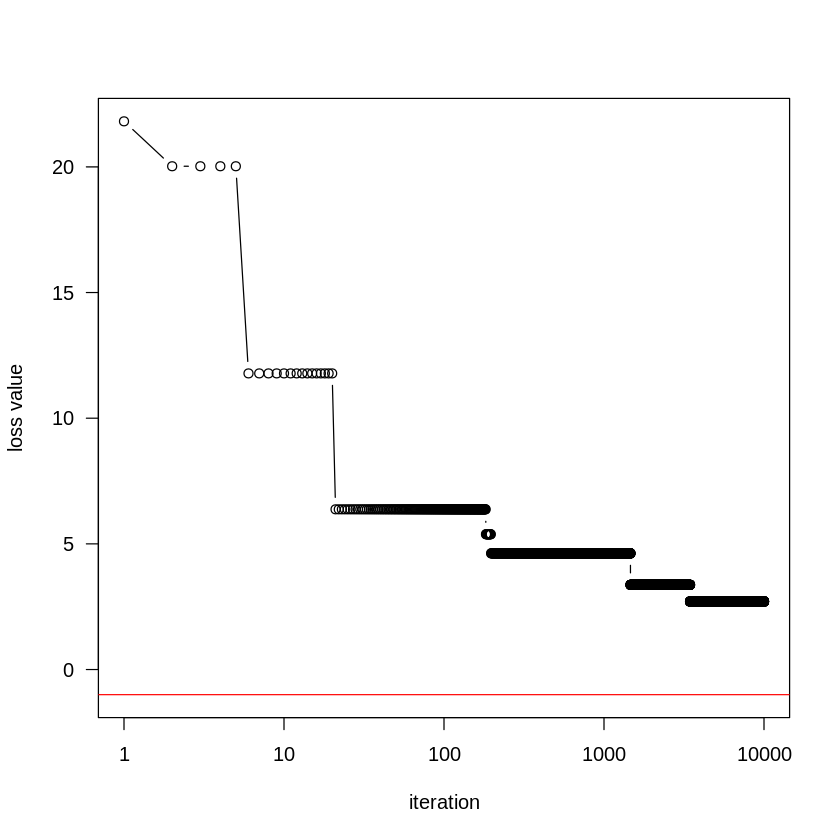

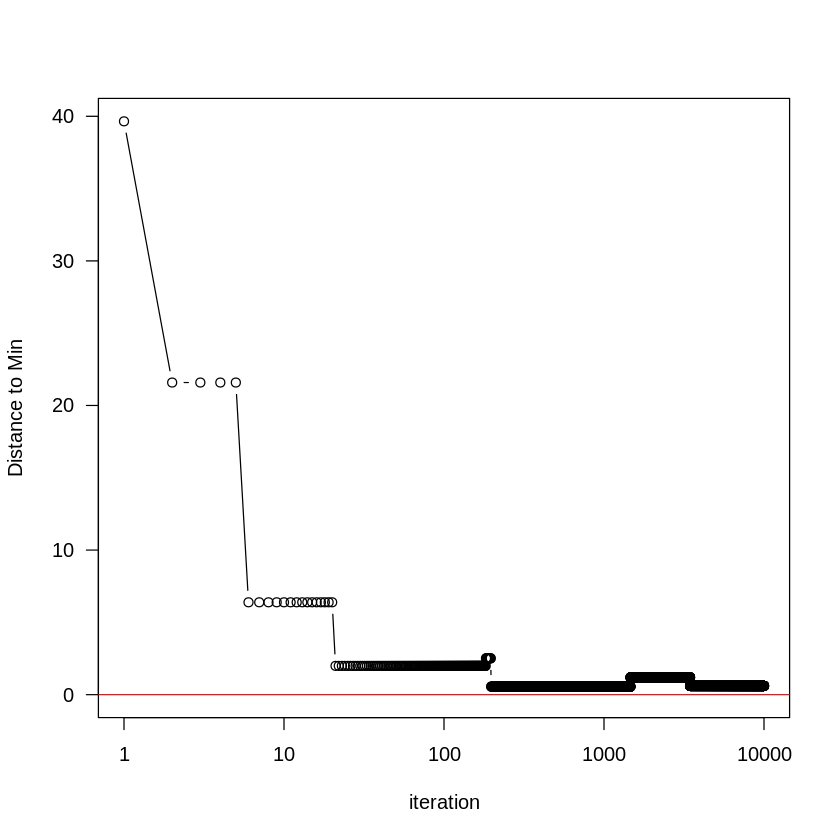

In [12]:
# Test SRS in 2D

nn = 1e4

# Run SRS
out = minimize.srs( f.loss = ackley, dd = 2, nn = nn )

# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0.5)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

  |======================================================================| 100%


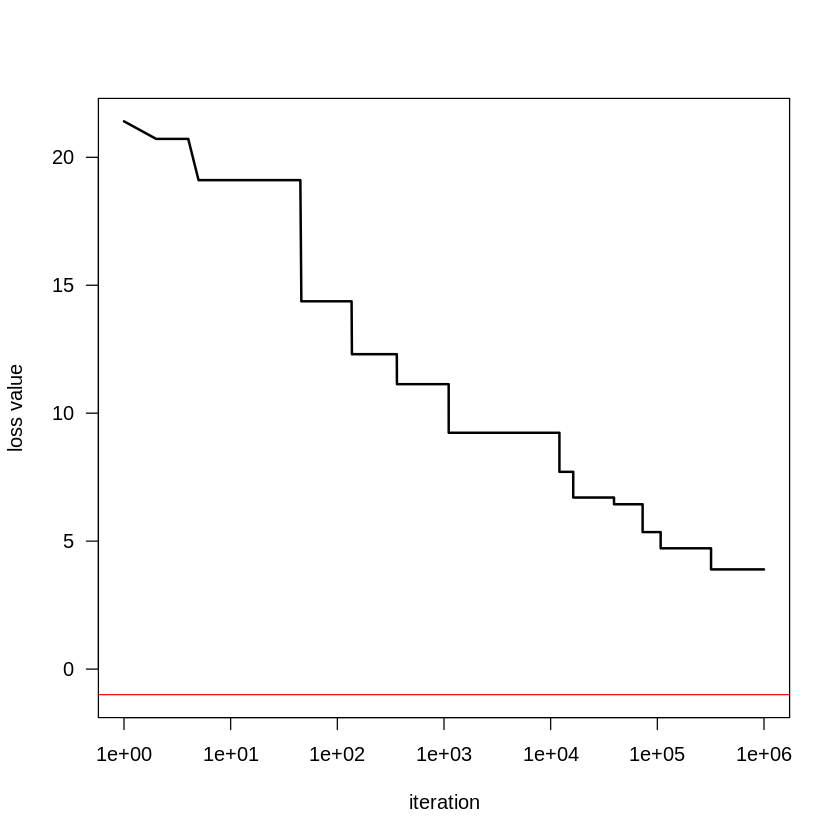

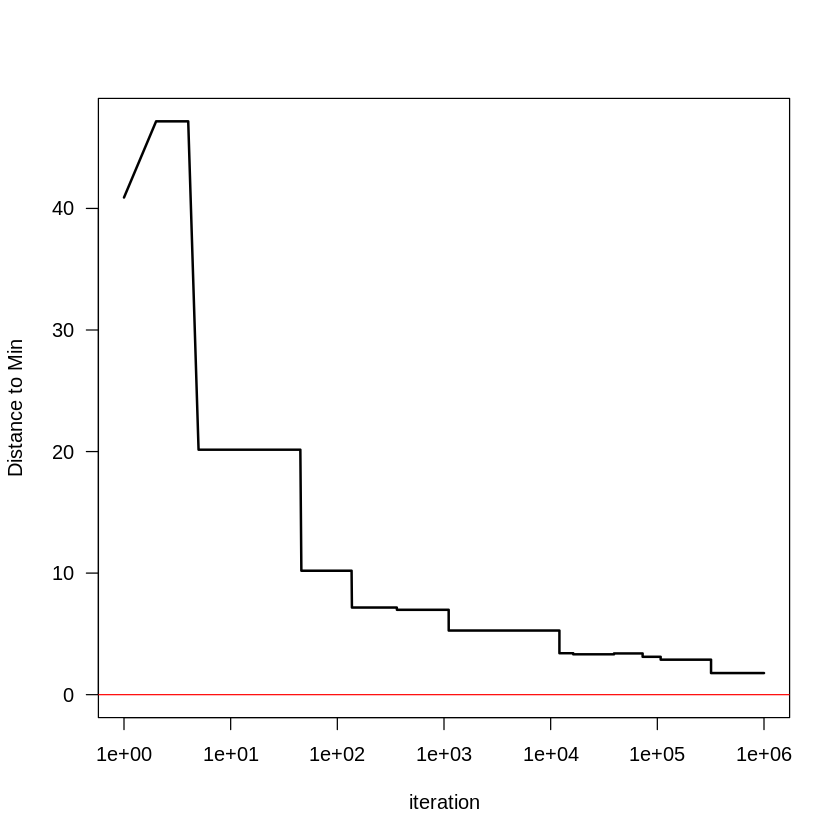

In [23]:
# Test SRS in 4D

nn = 1e6

# Run SRS
out = minimize.srs( f.loss = ackley, dd = 4, nn = nn )

# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='l',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss)),lwd=2
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='l',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist)),lwd=2
)
abline(h=0,col='red')

  |======================================================================| 100%


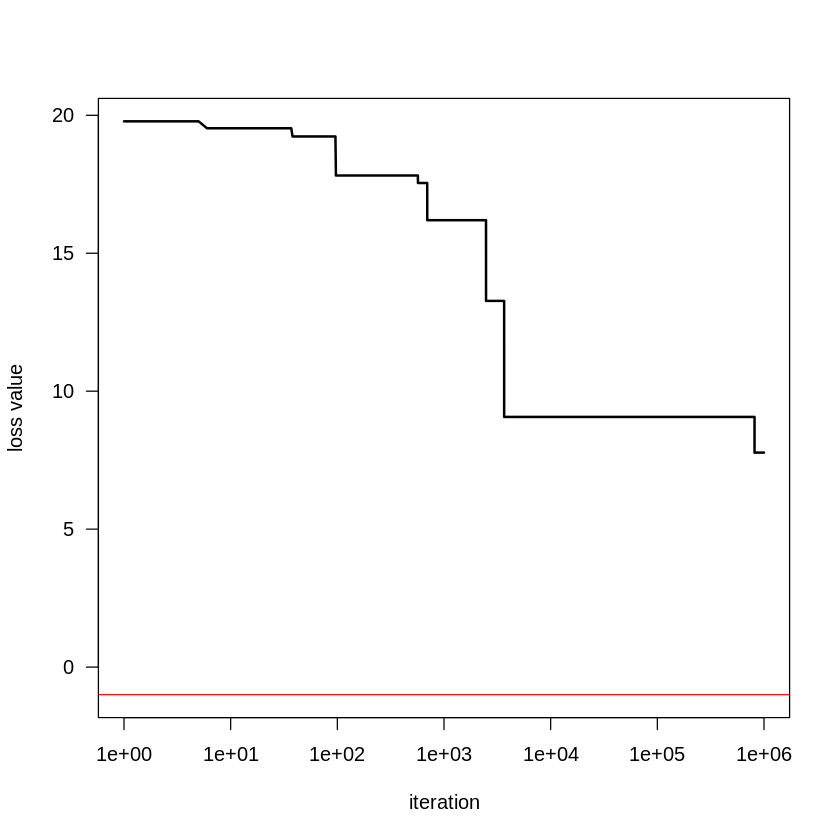

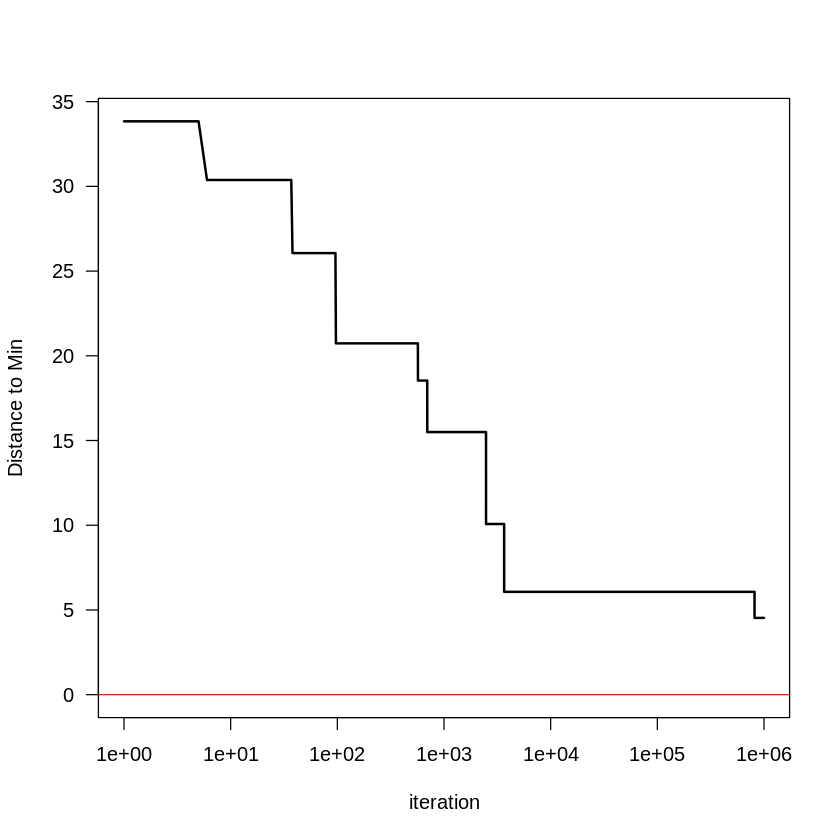

In [36]:
# Test SRS in 6D

nn = 1e6

# Run SRS
out = minimize.srs( f.loss = ackley, dd = 6, nn = nn )

# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='l',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss)),lwd=2
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='l',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist)),lwd=2
)
abline(h=0,col='red')

# LRS

In [14]:
# Minimize Loss over the [-32,32]^d hypercube
# where f.loss( theta )

minimize.lrs <- function(
  f.loss, dd = 2, nn = 1e5, sig=1, startingTheta = NULL
){
  theta    = matrix( 0, nrow = nn, ncol = dd)
  val.loss = rep(0,nn)
  # Simulate a first datapoint
  if( is.null(startingTheta) ){
    theta[1,] = runif( dd, -32,32 );
  } else {
    theta[1,] = startingTheta;
  }
  val.loss[1] = f.loss( theta[1,] );
  pb = txtProgressBar(1,nn,style=3)
  for( ii in 2:nn ){
    # Simulate additional points
    vv = rnorm(dd,0,sig);
    theta[ii,]   = theta[ii-1,]+vv;
    if( prod((theta[ii,]<=1)*(theta[ii,]>=0)) == 0 ){
      theta[ii,]   <- theta[ii-1,]
      val.loss[ii] <- val.loss[ii-1]
      next;
    }
    val.loss[ii] = f.loss( theta[ii,] );
    if( val.loss[ii]>val.loss[ii-1] ){
      # If we don't improve, switch back to the
      # previous theta_{i-1}
      theta[ii,]   <- theta[ii-1,];
      val.loss[ii] <- val.loss[ii-1];
    }    
    setTxtProgressBar(pb,ii)
  }
  close(pb)
  return(
    list(
      theta = theta,
      loss  = val.loss
    )
  )
}

  |===================================================================== |  98%


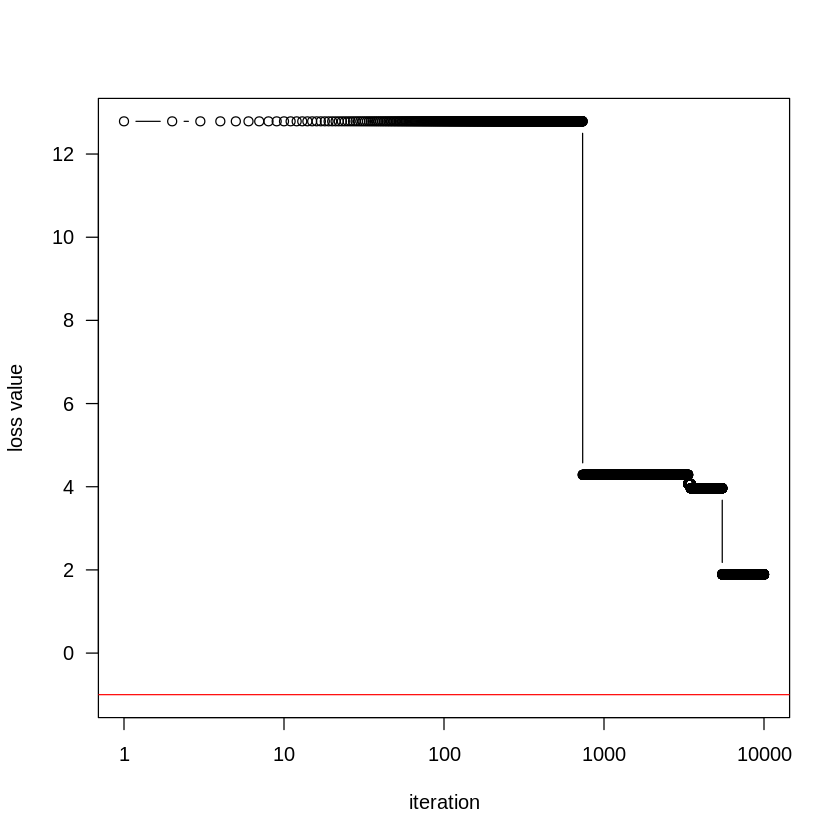

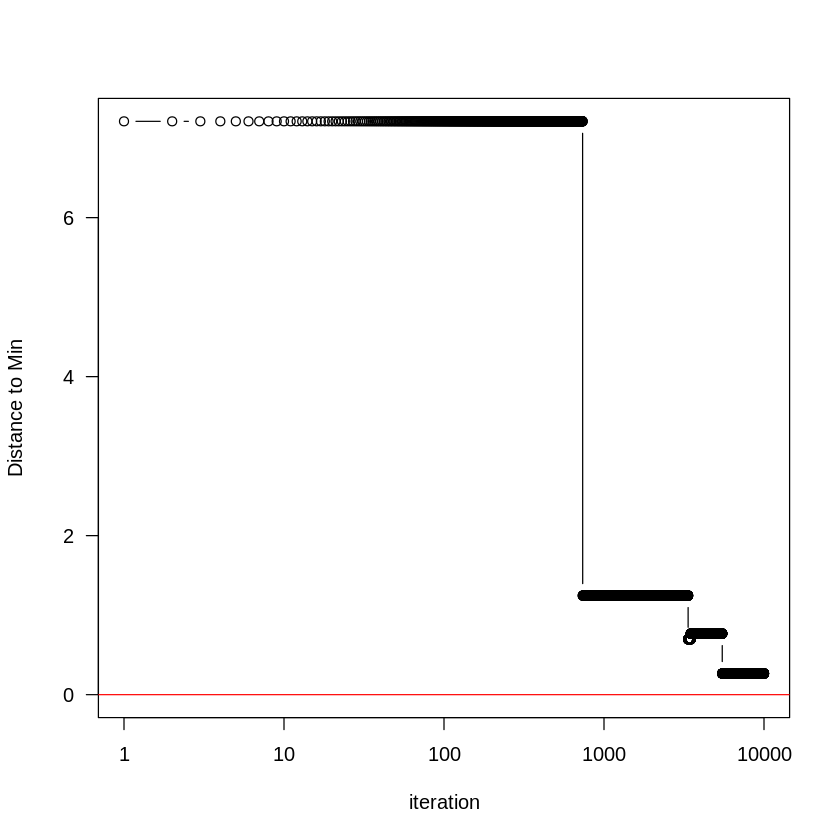

In [16]:
# Test LRS in 2D, sig=0.1

nn = 1e4

# Run LRS
out = minimize.lrs( 
  f.loss = ackley, dd = 2, nn = nn, sig=10,
  startingTheta = c(4,6)
)


# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

  |======================================================================| 100%


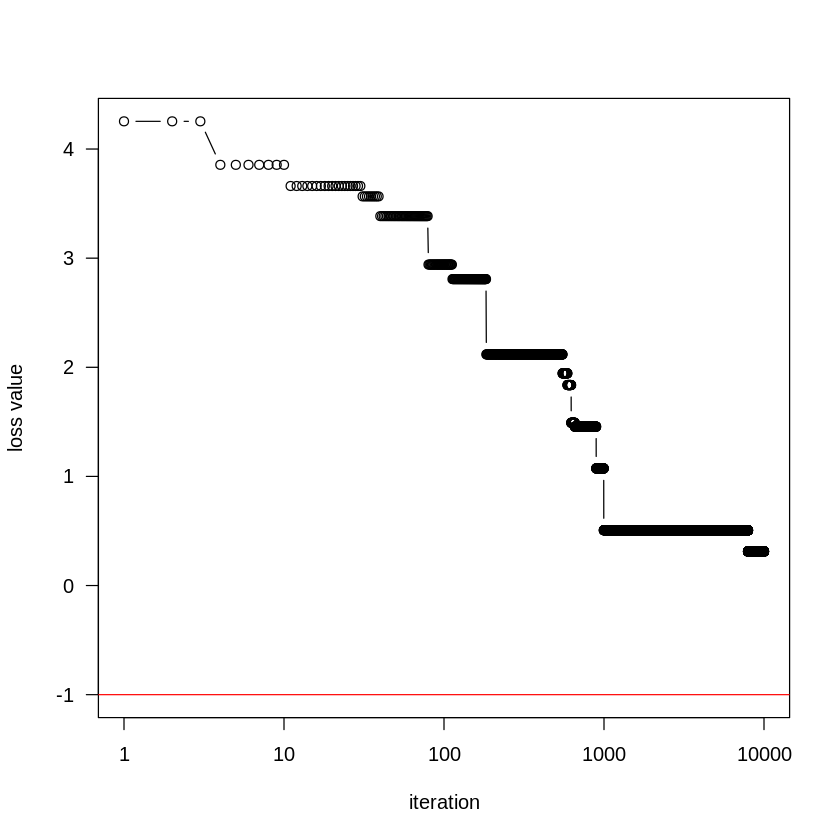

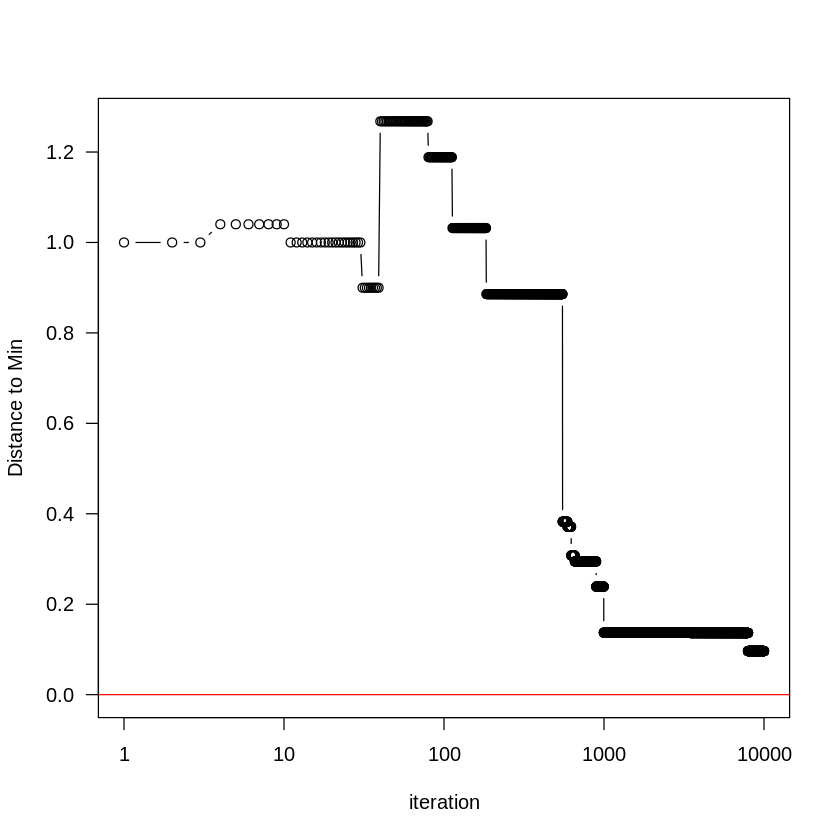

In [34]:
# Test LRS in 4D, sig=0.1

nn = 1e4

# Run LRS
out = minimize.lrs( 
  f.loss = ackley, dd = 4, nn = nn, sig=0.3,
  startingTheta = c(0.5,0.5,0.5,0.5)
)


# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

  |======================================================================| 100%


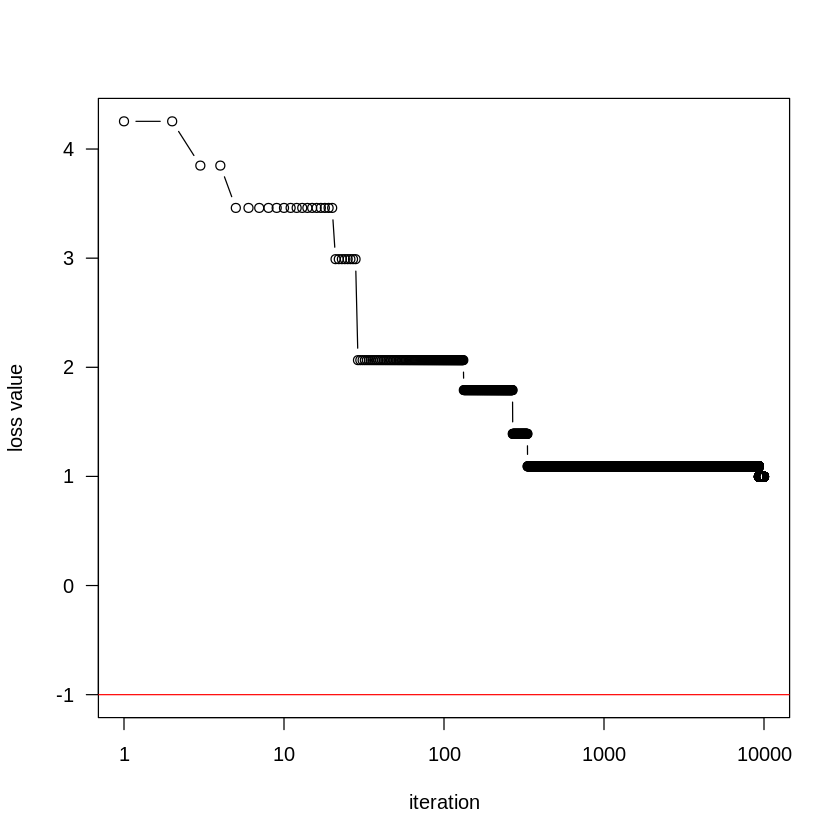

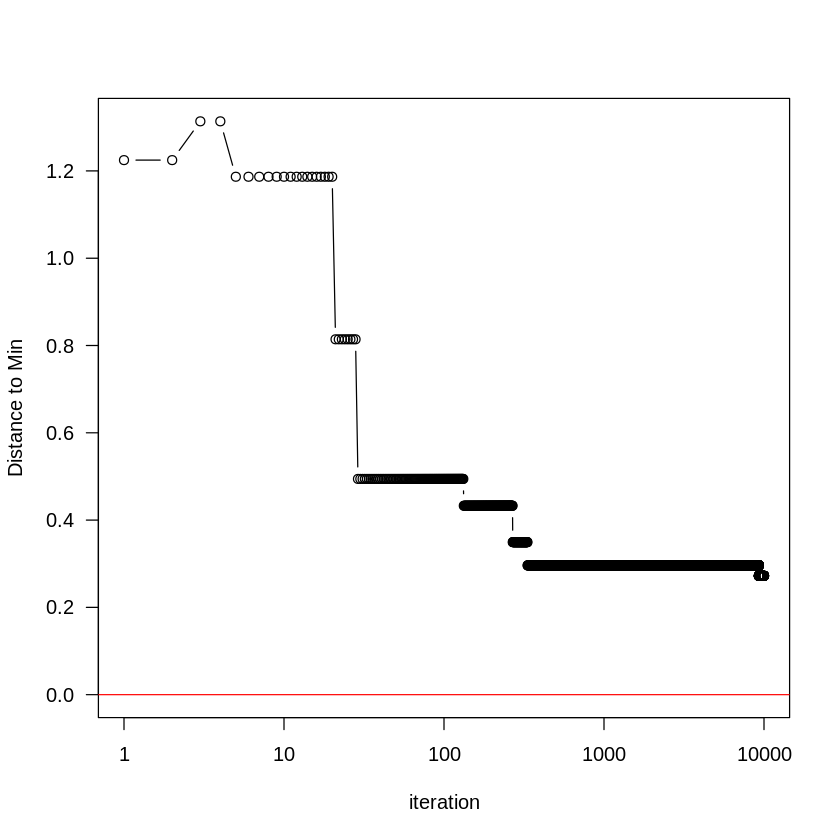

In [38]:
# Test LRS in 6D, sig=0.1

nn = 1e4

# Run LRS
out = minimize.lrs( 
  f.loss = ackley, dd = 6, nn = nn, sig=0.3,
  startingTheta = c(0.5,0.5,0.5,0.5,0.5,0.5)
)


# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

# ELRS

In [8]:
# Minimize Loss over the [-32,32]^d hypercube
# where f.loss( theta )

minimize.els <- function(
  f.loss, dd = 2, nn = 1e5, sig=1, startingTheta=NULL
){
  theta    = matrix( 0, nrow = nn, ncol = dd);
  val.loss = rep(0,nn);
  bb       = matrix( 0, nrow = nn, ncol = dd);
  # Simulate a first datapoint
  if( is.null(startingTheta) ){
    theta[1,] = runif( dd, -32,32 );
  } else {
    theta[1,] = startingTheta;
  }
  val.loss[1] = f.loss( theta[1,] );
  pb = txtProgressBar(1,nn,style=3)
  for( ii in 2:nn ){
    # Simulate additional points
    vv = rnorm(dd,0,sig);
    # Try adding vv
    theta[ii,]   = theta[ii-1,]+bb[ii-1,]+vv;
    if( prod((theta[ii,]<=1)*(theta[ii,]>=0)) == 1 ){
      val.loss[ii] = f.loss( theta[ii,] );
      if( val.loss[ii]<val.loss[ii-1] ){
        bb[ii,] = 0.2*bb[ii-1,] + 0.4*vv;
        setTxtProgressBar(pb,ii)
        next;  # Found an improvement! Go to next i.
      }
    }
    # Try subtracting vv
    theta[ii,]   = theta[ii-1,]+bb[ii-1,]-vv;
    if( prod((theta[ii,]<=1)*(theta[ii,]>=0)) == 1 ){
      val.loss[ii] = f.loss( theta[ii,] );
      if( val.loss[ii]<val.loss[ii-1] ){
        bb[ii,] = 0.2*bb[ii-1,] - 0.4*vv;
        setTxtProgressBar(pb,ii)
        next;  # Found an improvement! Go to next i.
      }
    }
    # Else, didn't find a better value
    bb[ii,] = 0.5*bb[ii-1,];
    theta[ii,]   <- theta[ii-1,]
    val.loss[ii] <- val.loss[ii-1]
    setTxtProgressBar(pb,ii)
  }
  close(pb)
  return(
    list(
      theta = theta,
      loss  = val.loss,
      bias  = bb
    )
  )
}


  |======================================================================| 100%


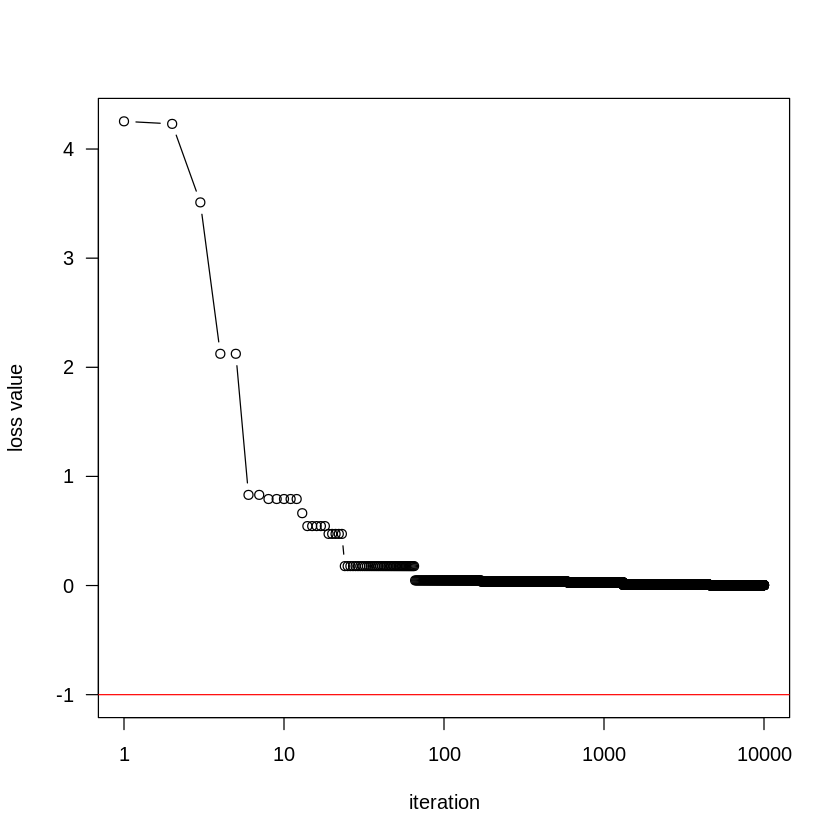

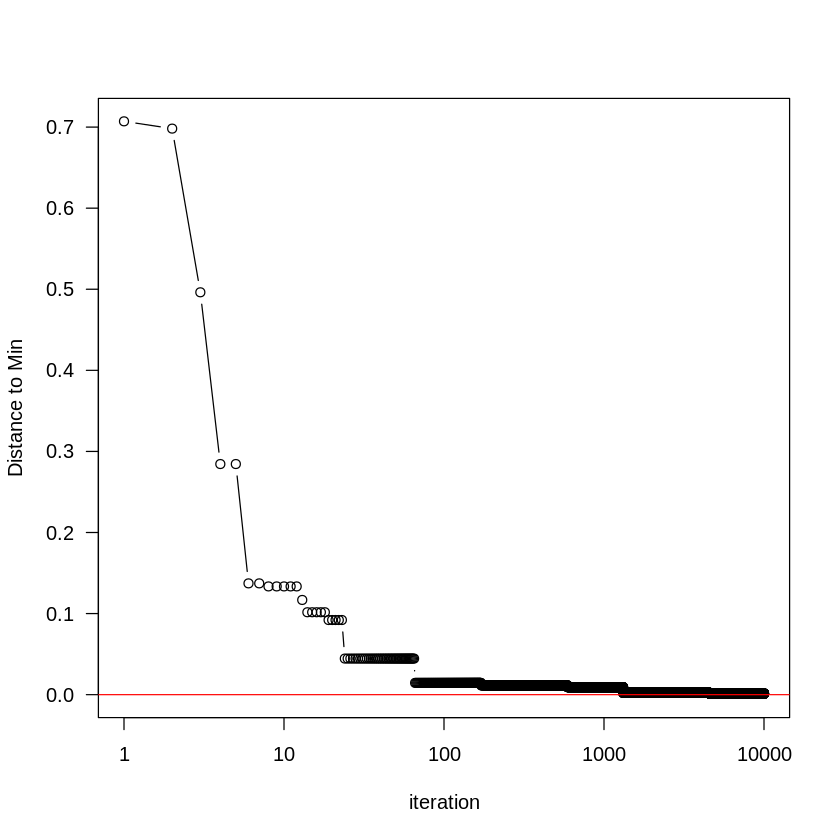

In [9]:
# Test ELRS in 2D, sig=0.1

nn = 1e4

# Run SRS
out = minimize.els( 
  f.loss = ackley, dd = 2, nn = nn, sig=0.1,
  startingTheta = c(0.5,0.5)
)


# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

  |======================================================================| 100%


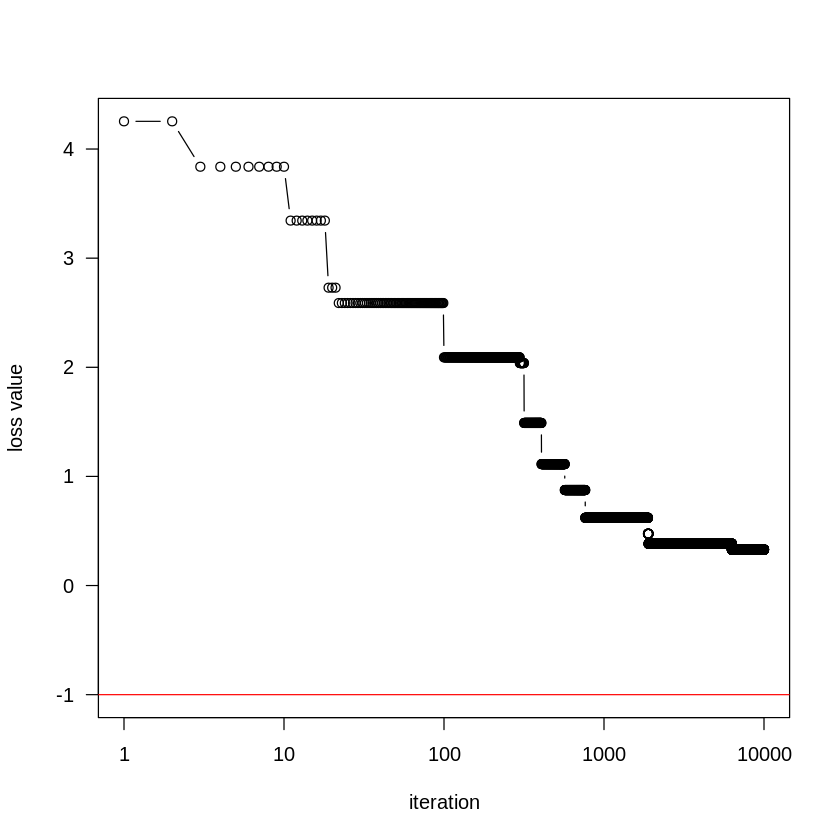

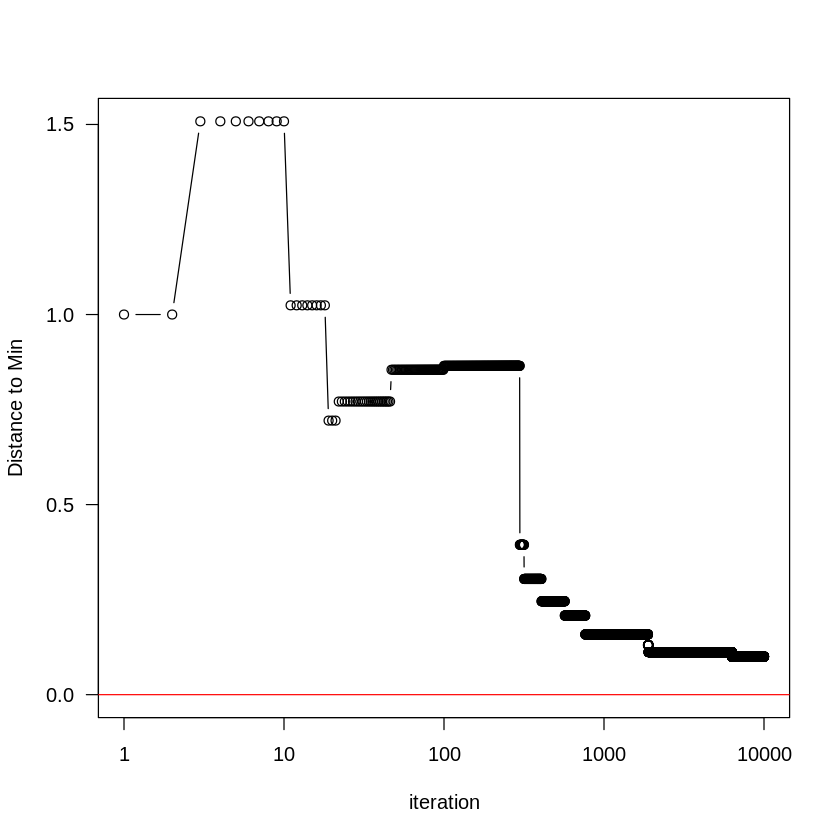

In [17]:
# Test ELRS in 4D, sig=0.5

nn = 1e4

# Run SRS
out = minimize.els( 
  f.loss = ackley, dd = 4, nn = nn, sig=0.3,
  startingTheta = c(0.5,0.5,0.5,0.5)
)


# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

  |======================================================================| 100%


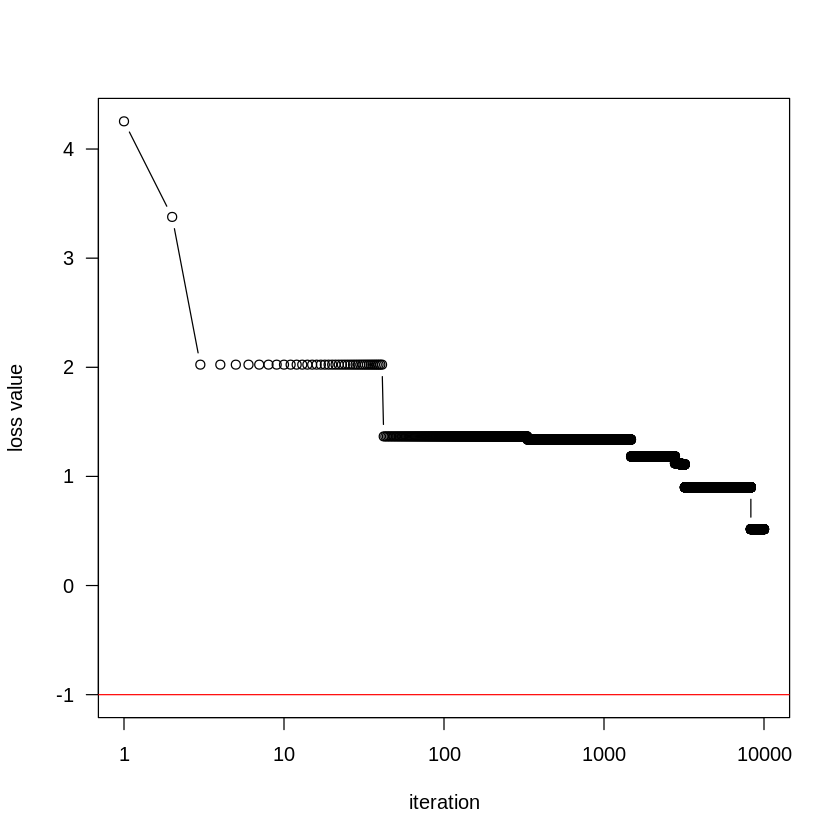

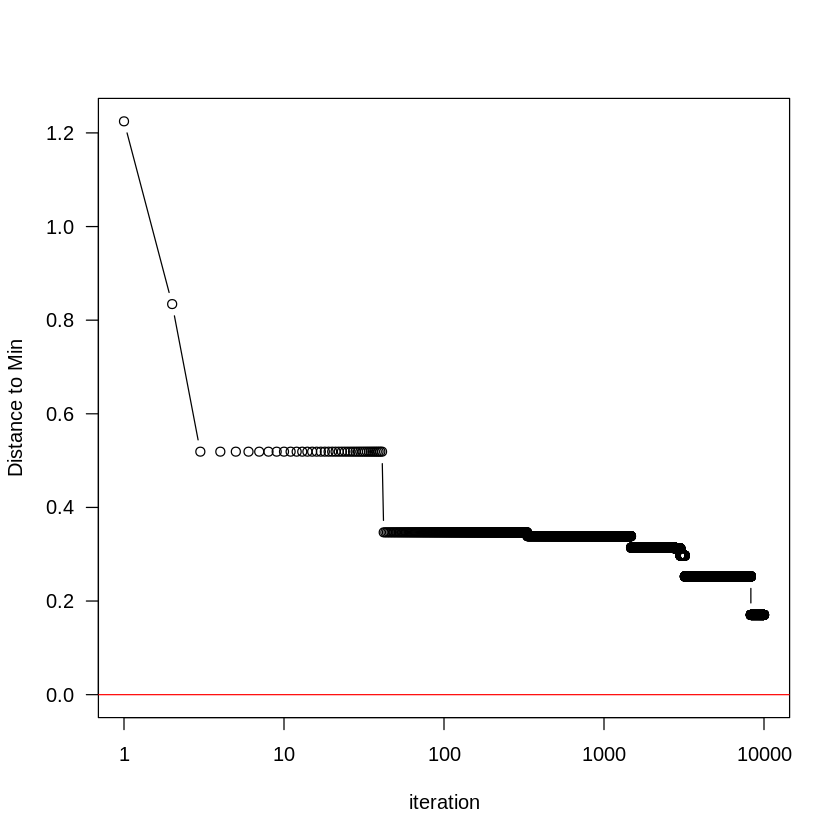

In [18]:
# Test ELRS in 6D, sig=0.5

nn = 1e4

# Run ELRS
out = minimize.els( 
  f.loss = ackley, dd = 6, nn = nn, sig=0.3,
  startingTheta = c(0.5,0.5,0.5,0.5,0.5,0.5)
)


# plot loss values and distance to the min
plot(
  1:nn, out$loss,type='b',log='x',las=1,
    ylab="loss value",xlab="iteration",
    ylim=c(-1,max(out$loss))
)
abline(h=-1,col='red')
th.dist = sqrt(rowSums((out$theta-0)^2))
plot(
  1:nn, th.dist,type='b',log='x',las=1,
  ylab="Distance to Min",xlab="iteration",
  ylim=c(0,max(th.dist))
)
abline(h=0,col='red')

# 2. Modelling the Nile river

In [5]:
robbinsMonro <- function(
    learned.f, grad.f, dd=3, max.steps=100, step.size = 1/(1:max.steps),
  loss.f = NULL, startTheta = NULL, thresh=1e-4, sigma
){
  th = matrix(0,max.steps,dd); #save theta values
  gr = matrix(0,max.steps,dd); #save gradients
  ls = rep(0,max.steps); # save loss values
  if( is.null(startTheta) ){
    th[1,] <- runif( dd,400,500 );
  } else {
    th[1,] <- startTheta;
  }

  gr[1,] <- grad.f( th[1,],1,sigma );
  print(gr[1,])
  if( !is.null(loss.f) )  # if loss function is given
    ls[1] <- loss.f( th[1,],sigma,learned.f(1,th[1,],sigma) );
  for( ii in 2:max.steps ){
    th[ii,] <- th[ii-1,] - step.size[ii]*gr[ii-1,];
    
   
    gr[ii,] <- grad.f( th[ii,],ii,sigma )
    if( !is.null(loss.f) )
      ls[ii] <- loss.f(th[ii,],sigma,learned.f(ii,th[ii,],sigma))
    
    if( sum( (th[ii,]-th[ii-1,])^2 ) < thresh^2 )
      break;
  }
  return(list(
    theta = th[1:ii,],
    grad  = gr[1:ii,],
    loss  = ls[1:ii]
  ))
}

In [4]:
learned_f <- function(x, theta, sigma) {
  k <- length(theta)
  summands <- rep(0, k)
  for (i in 1:k) {
      
      summands[i] <- theta[i] * exp( -1*sigma[i] * abs( x -  ((100*i) /(k+1)) ) )  
    
    
  }
  
  return(sum(summands))
}

In [3]:
grad_f <- function(theta,x,sigma){
    
    
    
    
    k <- length(theta)
    grad<-rep(0,k)
    
    for (i in 1:k) {
        
        grad[i] <- exp( -1*sigma[i] * abs(  x - ((100*i)/(k+1)) ))
            
    
    }
    
    
    
 
    
    return(grad)
        
}

In [220]:
L1<-function(theta,sigma,learned_f){
    
    k <- 100
    summands<-rep(0,k)
    for (i in 1:k) {
        
        summands[i] <- abs( Nile[i] - learned_f(i,theta,sigma) )
        
   
    }
   
    return(sum(summands)/100)
    
}

[1] 0.9685066 0.9367552 0.9060447


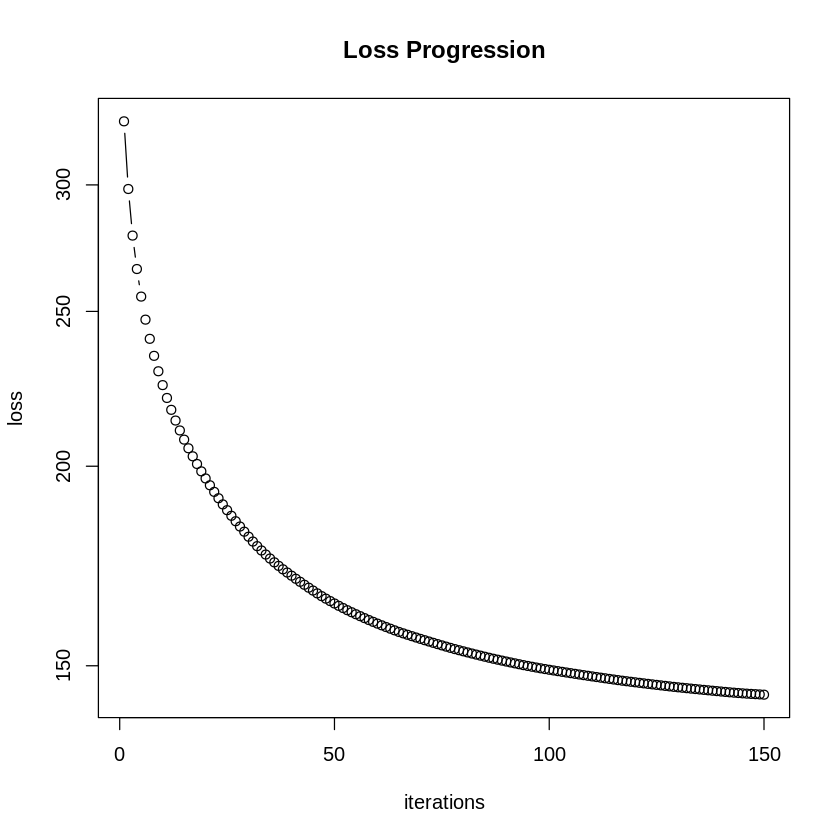

In [307]:
#fix the sigmas
k = 3
sigma = c(1/750,1/750,1/750)
thresh = 1e-100
out = robbinsMonro( learned.f = learned_f, grad.f = grad_f, dd = 3,NULL, loss.f=L1, max.steps = 150, step.size = 1/(1:150)*25,thresh, sigma )
plot( 
  out$loss,type='b', log='y', 
  main = "Loss Progression",xlab="iterations",ylab="loss"
);
 

In [1]:
L2<-function(theta,sigma,learned_f){
    
    k <- 100
    summands<-rep(0,k)
    for (i in 1:k) {
        
        summands[i] <- ( Nile[i] - learned_f(i,theta,sigma) )^2
        
   
    }
   
    return(sum(summands)/200)
    
}

[1] 0.9685066 0.9367552 0.9060447


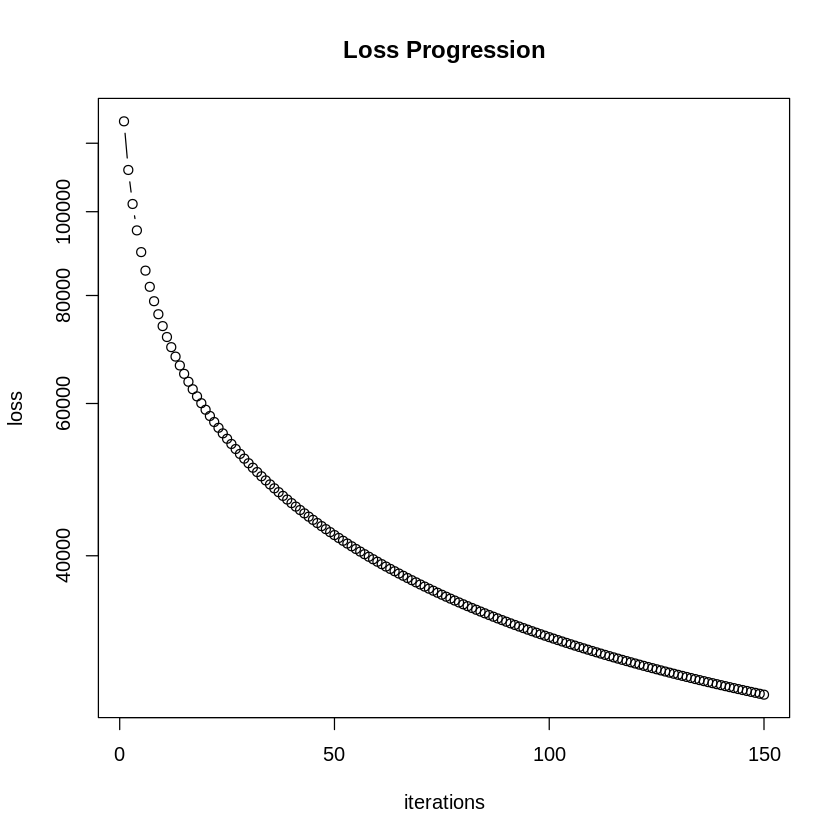

In [6]:
#fix the sigmas
k = 3
sigma = c(1/750,1/750,1/750)
thresh = 1e-100
out = robbinsMonro( learned.f = learned_f, grad.f = grad_f, dd = 3,NULL, loss.f=L2, max.steps = 150, step.size = 1/(1:150)*25,thresh, sigma )
plot( 
  out$loss,type='b', log='y', 
  main = "Loss Progression",xlab="iterations",ylab="loss"
);
 